In [3]:
%matplotlib inline
import seaborn
import numpy as np, scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd
import librosa, librosa.display

[&larr; Back to Index](index.html)

# Inverse Fourier Transform

In a previous lecture, we explored the **Fourier transformation**, which converts an audio signal (time scale) to the frequency scale.  The **inverse Fourier transformation** can be used to convert from the frequency scale back to the time scale.  This can be used to create music at a specific frequency or filter out specific tones/frequencies.

## Motivating Example - Adding Pure Tones

In [7]:
def make_pitch(f0, T = 2.0, sr = 22050):
    t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.1*np.sin(2*np.pi*f0*t)
    return (x, sr)

def make_wave_plots(*args, lower = 0, upper = 528, alpha = 0.2):
    """ Makes stacked wave plots for each of the arguments.
    
    args - an number of np array's from audio wav files."""
    n = len(args)
    fig = plt.figure(figsize=(15, n))
    for i, seq in enumerate(args):
        plt.subplot(n, 1, i + 1)
        librosa.display.waveplot(seq[lower:upper], sr, alpha=alpha)
    return fig

In [30]:
a440, sr = make_pitch(440.0)
d294, sr = make_pitch(294.0)
mix = a440 + d294
f349, sr = make_pitch(349.0)
c523, sr = make_pitch(523.0)
mix2 = a440 + d294 + f349 + c523

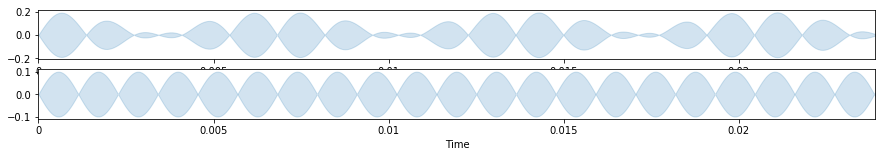

In [31]:
_ = make_wave_plots(mix, a440)

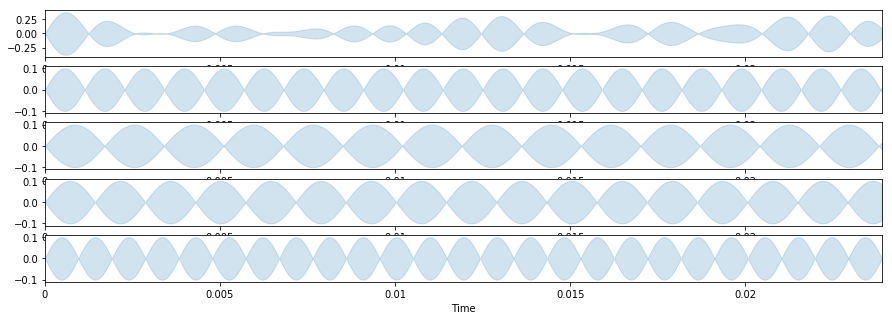

In [32]:
_ = make_wave_plots(mix2, a440, d294, f349, c523)

## Creating frequency

* We plot frequency by fft
* First create the range of frequencies

# Review - Computing the `fft` with `numpy`

Here we compute the `rfft`, or *real-valued fast Fourier transformation*

In [48]:
mix_fft = np.fft.fft(mix)

## Plotting the `fft`

In [49]:
n = mix.size
timestep = 1/sr
f = np.fft.fftfreq(n, d=timestep) # Get the frequencies

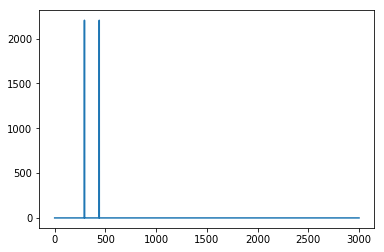

In [53]:
filt = np.logical_and(f > 0, f <= 3000)
plt.plot(f[filt], np.absolute(mix_fft[filt]))

## Inverse Fourier Transform

The *inverse Fourier Transform* ([Wikipedia](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform#Inverse_transform)) can be used to transform audio frequency domain *back* to the time scale.

## Taking a Round Trip

The function `irfft` is the *inverse real-valued fast Fourier transform*, and is used to undo `rfft`

In [35]:
ipd.Audio(mix, rate=sr)

In [42]:
back_to_time = np.fft.irfft(mix_rfft)
ipd.Audio(back_to_time, rate=sr)

## Using `rfft` and `irfft` to filter frequencies

1. `rfft` to convert to freq. domain.
2. Multiply by a filter to dampen/amplify some frequencies
3. `irfft` to get back to the time domain

## Example - Removing D294 from the Mix

In [66]:
remove_294 = lambda f, fft_val: 0.0j if 293.5 <= np.abs(f) <= 294.5 else  fft_val
filtered_fft = np.array([remove_294(freq, val) for freq, val in zip(f, mix_fft)])
filtered_mix = np.fft.ifft(filtered_fft)
ipd.Audio(filtered_mix, rate=sr)

/Users/tiverson/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/lib/display.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [67]:
ipd.Audio(a440, rate=sr)

In [68]:
ipd.Audio(mix, rate=sr)

## <font color="red"> Exercise 1 </font>

Apply a filter to remove A and C from `mix2`.  Compare the resulting audio to `d294 + f349`

## <font color="red"> Exercise 2 </font>

The following code adds noise to a audio signal.  Use `fft` and `ifft` to identify and remove this noise.

In [103]:
noisy_tone, sr = librosa.load('audio/noisy_tone.wav')
ipd.Audio(noisy_tone, rate=sr)

## Using `ifft` to Create Music

Next, we will use frequencies and the inverse transformation to make music, specifically chord

## Chord

A [**chord**](https://en.wikipedia.org/wiki/Chord_(music)) is a set of notes that are heard together.  [This page](https://www.michael-thomas.com/music/class/chords_notesinchords.htm) list the notes in a number of chords and [this page](http://pages.mtu.edu/~suits/notefreqs.html) gives frequencies for each note.  

**Task:** Use the inverse Fourier transformation to create a C major chord.

In [106]:
no_sound = np.zeros(5*sr)
ipd.Audio(no_sound, rate=sr)

/Users/tiverson/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/lib/display.py:136: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data/np.max(np.abs(data))*32767).tolist()


In [107]:
no_sound_fft = np.fft.fft(no_sound)
freqs = np.fft.fftfreq(no_sound.size, d=1/sr) # Get the frequencies

In [110]:
freqs # rounded to 1/5th

array([ 0. ,  0.2,  0.4, ..., -0.6, -0.4, -0.2])

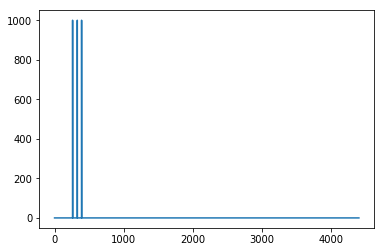

In [120]:
chord_freqs = [261.6, 329.6, 392.0]
new_fft = np.array([1000.0j if np.abs(f) in chord_freqs else 0.0j for f in freqs])
plt.plot(freqs[:n//2], np.absolute(new_fft[:n//2]))

In [121]:
new_chord = np.fft.ifft(new_fft)
ipd.Audio(new_chord, rate=sr)

/Users/tiverson/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/lib/display.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## <font color="red"> Exercise 3 </font>

Use this approach to create an E minor chord.

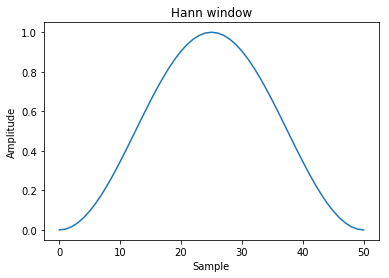

In [4]:
from matplotlib import pylab as plt
from numpy.fft import fft, fftshift
window = np.hanning(51)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

/Users/tiverson/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


(-0.55, 0.55, -104.99139982823809, 4.819396392999732)

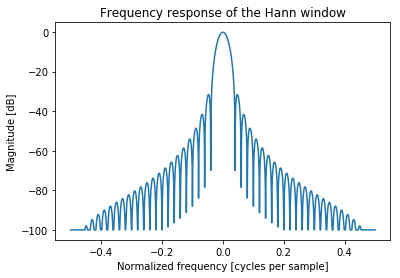

In [3]:
plt.figure()
A = fft(window, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response)
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')